**INITIALIZATION:**
- I use these three lines of code on top of my each notebooks because it will help to prevent any problems while reloading the same project. And the third line of code helps to make visualization within the notebook.

In [1]:
#@ INITIALIZATION: 
%reload_ext autoreload
%autoreload 2
%matplotlib inline

**DOWNLOADING LIBRARIES AND DEPENDENCIES:**
- I have downloaded all the libraries and dependencies required for the project in one particular cell.

In [2]:
#@ DOWNLOADING LIBRARIES AND DEPENDENCIES: 
import numpy as np
from skimage.exposure import rescale_intensity
import cv2
import imutils
from google.colab.patches import cv2_imshow

**CONVOLUTIONS:**
- **Convolution** is simply an elementwise multiplication of two matrices followed by a sum. 

In [3]:
#@ DEFINING CUSTOM CONVOLUTION METHOD: WITH OPENCV: 
def convolve(image, kernel):                            # Defining Convolve Function.    
    (iH, iW) = image.shape[:2]                          # Initializing Height and Width of Image. 
    (kH, kW) = kernel.shape[:2]                         # Initializing Height and Width of Kernel. 
    pad = (kH - 1) // 2                                 # Initializing Padding. 
    image = cv2.copyMakeBorder(image,pad,pad,pad,pad,
                               cv2.BORDER_REPLICATE)    # Padding Input Image. 
    output = np.zeros((iH, iW), dtype="float32")        # Initializing Dimension of Input Image. 
    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):
            roi = image[y-pad : y+pad+1, x-pad:x+pad+1] # Getting ROI of Image. 
            k = (roi * kernel).sum()                    # Initializing Convolution. 
            output[y-pad, x-pad] = k
    output = rescale_intensity(output,in_range=(0,255)) # Rescaling Output Image. 
    output = (output * 255).astype("uint8")
    return output 

In [4]:
#@ CONSTRUCTING AVERAGE BLURRING KERNELS:
smallblur = np.ones((7, 7),dtype="float") * (1.0/(7*7))     # Initializing Kernel. 
largeblur = np.ones((21,21),dtype="float")*(1.0/(21*21))    # Initializing Kernel. 

#@ CONSTRUCTING SHARPENING FILTER:
sharpen = np.array(([0, -1, 0], 
                    [-1, 5, -1],
                    [0, -1, 0]), dtype="int")

#@ CONSTRUCTING LAPLACIAN KERNEL: 
laplacian = np.array(([0, 1, 0],
                      [1, -4, 1], 
                      [0, 1, 0]), dtype="int")

#@ CONSTRUCTING SOBEL X-AXIS KERNEL:
sobelX = np.array(([-1, 0, 1], 
                   [-2, 0, 2], 
                   [-1, 0, 1]), dtype="int")

#@ CONSTRUCTING SOBEL Y-AXIS KERNEL: 
sobelY = np.array(([-1, -2, -1],
                   [0, 0, 0], 
                   [1, 2, 1]), dtype="int")

#@ CONSTRUCTING KERNEL BANK: 
kernelBank = (
    ("small_blur", smallblur), 
    ("large_blur", largeblur), 
    ("sharpen", sharpen), 
    ("sobel_x", sobelX),
    ("sobel_y", sobelY)
)

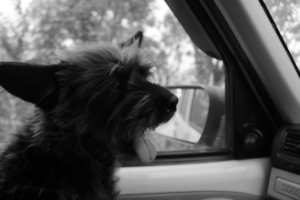

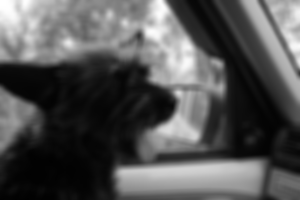

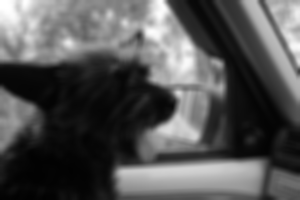

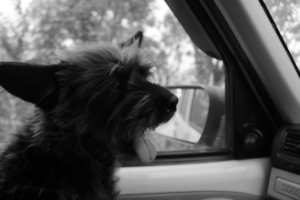

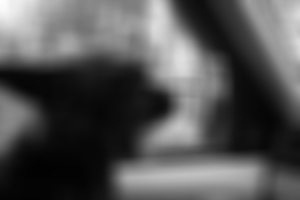

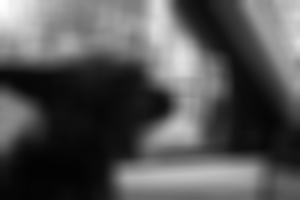

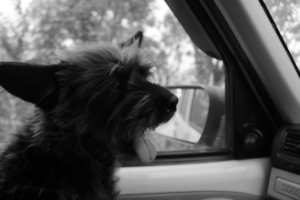

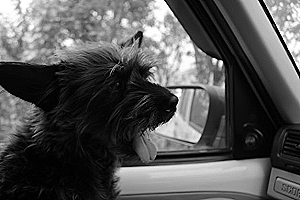

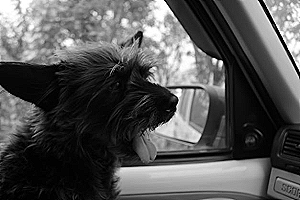

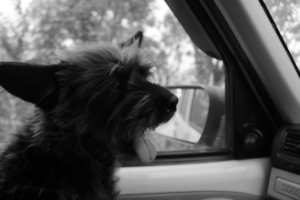

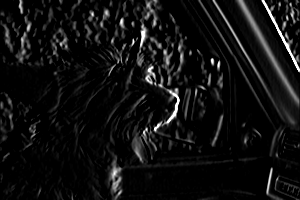

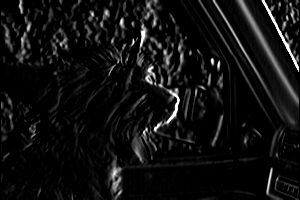

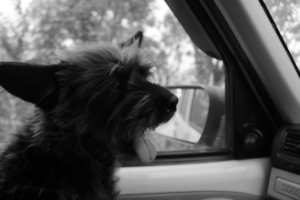

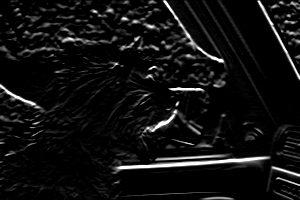

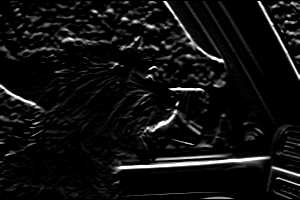

In [5]:
#@ IMPLEMENTATION OF CONVOLUTIONS: 
image = cv2.imread("/content/Bal1.JPG")                # Reading Image. 
image = imutils.resize(image, width=300)               # Resizing Image. 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)         # Converting into Grayscale Image. 

#@ IMPLEMENTATION OF CONVOLUTIONS: 
for (kernelName, kernel) in kernelBank:
    convolveOutput = convolve(gray, kernel)            # Implementation of Convolve Method. 
    opencvOutput = cv2.filter2D(gray, -1, kernel)      # Implementation of OpenCV. 
    cv2_imshow(gray)                                   # Inspecting Image. 
    cv2_imshow(convolveOutput)
    cv2_imshow(opencvOutput)